In [1]:
import pandas as pd

In [6]:
data = {
    'name' : ['test', 'test2', 'test3'],
    'age' : [20, 30, 40]
}
df = pd.DataFrame(data)
df

,name,age
0,test,20
1,test2,30
2,test3,40


In [7]:
data2 = {
    'name' : ['test4', 'test5'],
    'loc' : ['seoul', 'busan']
}
df2 = pd.DataFrame(data2)
df2

,name,loc
0,test4,seoul
1,test5,busan


In [15]:
pd.concat(
    [df,df2],
    axis = 0,
    ignore_index = True
)


,name,age,loc
0,test,20.0,NaN
1,test2,30.0,NaN
2,test3,40.0,NaN
3,test4,NaN,seoul
4,test5,NaN,busan


In [16]:
data = {
    'name' : ['test', 'test2', 'test3' ],
    'loc' : ['서울', '경기', '강원']
}
df3 = pd.DataFrame(data)
df3

,name,loc
0,test,서울
1,test2,경기
2,test3,강원


In [17]:
data2 = {
    'location' : ['서울', '경기', '강원', '세종'],
    'code' : ['11','31','32','29']
}
df4 = pd.DataFrame(data2)
df4

,location,code
0,서울,11
1,경기,31
2,강원,32
3,세종,29


In [23]:
pd.merge(df3,df4, how = 'outer', left_on = 'loc', right_on = 'location')

,name,loc,location,code
0,test3,강원,강원,32
1,test2,경기,경기,31
2,test,서울,서울,11
3,NaN,NaN,세종,29


In [24]:
df4.rename(
    columns = {'location': 'loc'},
    inplace = True
)
pd.merge(df3, df4, how = 'outer', on = 'loc')

,name,loc,code
0,test3,강원,32
1,test2,경기,31
2,test,서울,11
3,NaN,세종,29


In [25]:
tran_1 = pd.read_csv("../csv/tran_1.csv")
tran_2 = pd.read_csv("../csv/tran_2.csv")
tran_d1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d2 = pd.read_csv("../csv/tran_d_2.csv")


In [26]:
tran_1.head(2)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019


In [27]:
tran_2.head(2)

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892


In [29]:
tran_12 = pd.concat([tran_1, tran_2], axis = 0, ignore_index = True )

In [31]:
tran_d12 = pd.concat([tran_d1, tran_d2], axis = 0 , ignore_index = True)

In [32]:
tran_12.head(2)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019


In [33]:
tran_d12.head(2)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1


In [43]:
total_df = pd.merge(tran_12, tran_d12, how = 'outer', on = 'transaction_id')

In [38]:
len(tran['transaction_id'].unique())

6786

In [41]:
item_master = pd.read_csv('../csv/item_master.csv')
item_master.head(3)

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000


In [44]:
total_df.head(3)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1


In [45]:
total_df = pd.merge(total_df, item_master, how = 'left', on = 'item_id')

In [47]:
total_df.head(3)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000


In [49]:
total_df['payment_date'] = pd.to_datetime(total_df['payment_date'])

In [2]:
from datetime import datetime

In [51]:
total_df['payment_date'].map(
    lambda x : x.strftime('%a')
)

0       Fri
1       Fri
2       Fri
3       Fri
4       Fri
       ... 
7139    Wed
7140    Wed
7141    Wed
7142    Wed
7143    Wed
Name: payment_date, Length: 7144, dtype: object

In [53]:
total_df['week'] = total_df['payment_date'].dt.strftime('%w')

In [56]:
total_df[['week', 'price']].groupby('week').agg(['sum', 'count'])

price      
            sum count
week                 
0     157530000  1051
1     145870000   988
2     153365000  1012
3     151295000  1022
4     153230000   992
5     161465000  1063
6     151995000  1016

In [ ]:
#---------------------------------- 0326 card

In [1]:
from datetime import datetime 
import pandas as pd

In [2]:
offline = pd.read_csv('../csv/card/오프라인.csv', encoding = 'CP949')

In [3]:
offline.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [4]:
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [5]:
offline.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [6]:
offline.head(2)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.0
1,201901,백화점,1,10,379,19458720.0


In [7]:
pd.to_datetime(offline['기준년월'],format = '%Y%m')

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [8]:
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format = '%Y%m')

In [9]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    2648 non-null   datetime64[ns]
 1   업종      2648 non-null   object        
 2   성별      2648 non-null   int64         
 3   연령대     2648 non-null   int64         
 4   총이용건수   2648 non-null   int64         
 5   총이용금액   2648 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 124.3+ KB


In [10]:
offline['기준년'] = offline['기준년월'].dt.strftime('%Y')

In [11]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년
0,2019-01-01,백화점,1,1,1,7.600000e+03,2019
1,2019-01-01,백화점,1,10,379,1.945872e+07,2019
2,2019-01-01,백화점,1,20,45173,4.747711e+09,2019
3,2019-01-01,백화점,1,30,271858,2.791826e+10,2019
4,2019-01-01,백화점,1,40,391109,3.791149e+10,2019


In [12]:
offline['건당이용금액'] = offline['총이용금액'] / offline['총이용건수']
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년,건당이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03,2019,7600.000000
1,2019-01-01,백화점,1,10,379,1.945872e+07,2019,51342.269129
2,2019-01-01,백화점,1,20,45173,4.747711e+09,2019,105100.635357
3,2019-01-01,백화점,1,30,271858,2.791826e+10,2019,102694.279892
4,2019-01-01,백화점,1,40,391109,3.791149e+10,2019,96933.301601


In [14]:
group_data = offline[['성별', '기준년', '건당이용금액']].groupby(['성별', '기준년']).mean()

In [19]:
pivot_data = offline.pivot_table(
    index = '성별',
    columns= '기준년', 
    values = '건당이용금액',
    aggfunc = 'mean'
)

<Axes: xlabel='성별,기준년'>

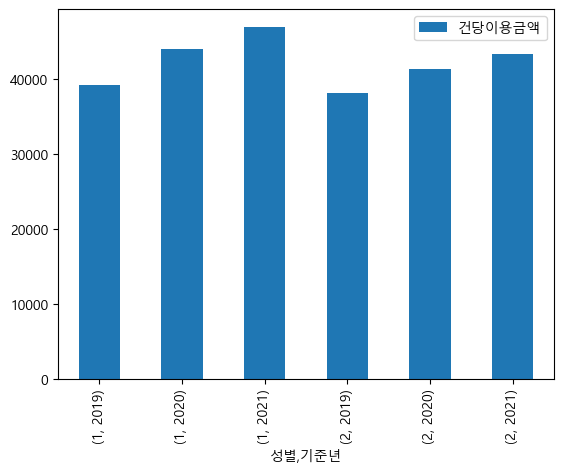

In [18]:
import platform 
import matplotlib.pyplot as plt 
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')
group_data.plot(kind = 'bar')

<Axes: xlabel='성별'>

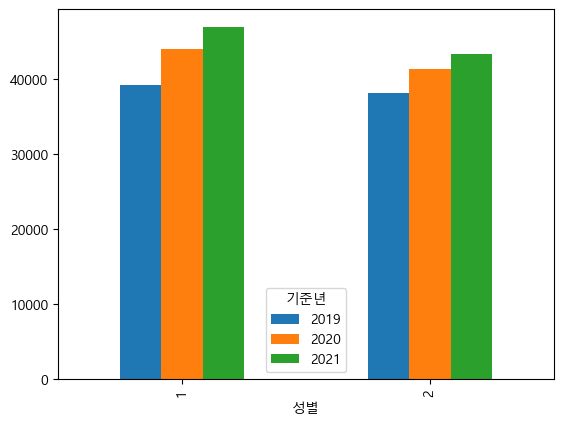

In [20]:
pivot_data.plot(kind = 'bar')

In [21]:
group_data.unstack()

건당이용금액
성별 기준년               
1  2019  39184.349662
   2020  44009.589591
   2021  46948.320084
2  2019  38107.838544
   2020  41389.763130
   2021  43306.318972